# Classifying IRIS species using univariate Gaussian Classifier

**Note:** You can use built-in code for mean, variance, covariance, determinant, etc.

In [3]:
# Standard includes
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Useful module for dealing with the Gaussian density
from scipy.stats import norm, multivariate_normal #in case you use buit-in library
# installing packages for interactive graphs
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
from sklearn import datasets

### Loading the IRIS dataset

In [4]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
featurenames = ['petal_length', 'petal_width', 'sepal_length', 'sepal_width']

Confirm the dimensions:

In [5]:
X.shape, Y.shape

((150, 4), (150,))

In [6]:
# Split 150 instances into training set (trainx, trainy) of size 105 and test set (testx, testy) of size 45
np.random.seed(0)
perm = np.random.permutation(150)
trainx = X[perm[0:105],:]
trainy = Y[perm[0:105]]
testx = X[perm[105:150],:]
testy = Y[perm[105:150]]

In [7]:
labels = np.unique(trainy)
print(f'Classes ({len(labels)}): classes={labels}')
print(f'Features ({len(featurenames)}): {featurenames}')

Classes (3): classes=[0 1 2]
Features (4): ['petal_length', 'petal_width', 'sepal_length', 'sepal_width']


Let's see how many training points there are from each class.

In [8]:
sum(trainy==0), sum(trainy==1), sum(trainy==2)

(33, 34, 38)

### Q1. Can you figure out how many test points there are from each class? 

In [9]:
# TODO: add your code to find how many test points there are from each class
sum(testy==0), sum(testy==1), sum(testy==2)

(17, 16, 12)

### Look at the distribution of a single feature from one of the species

Let's pick just one feature: 'petal_length'. This is the first feature, that is, number 0. Here is a *histogram* of this feature's values under species 1, along with the *Gaussian fit* to this distribution.

<img src="density.png">

In [10]:
@interact(feature=IntSlider(0,0,3), label=IntSlider(0,0,2))
def density_plot(feature, label):
    plt.hist(trainx[trainy==label,feature], density=True)
    #
    mu = np.mean(trainx[trainy==label,feature]) # mean
    var = np.var(trainx[trainy==label,feature]) # variance
    std = np.sqrt(var) # standard deviation
    x_axis = np.linspace(mu - 3*std, mu + 3*std, 1000)
    plt.plot(x_axis, norm.pdf(x_axis,mu,std), 'r', lw=2)
    plt.xticks(np.arange(10)) # this code forces the xticks to be between 0 and 10
    plt.title("Species "+str(label) )
    plt.xlabel(featurenames[feature], fontsize=14, color='red')
    plt.ylabel('Density', fontsize=14, color='red')
    plt.show()

interactive(children=(IntSlider(value=0, description='feature', max=3), IntSlider(value=0, description='label'…

### Q2. In the function **density_plot**, the code for plotting the Gaussian density focuses on the region within 3 standard deviations of the mean. Do you see where this happens? Why do you think we make this choice?

Because according to the central limit theorem, 99.5% of the data is there, and this avoids outliers

### Q3. Here's something for you to figure out: for which feature (0-3) does the distribution of (training set) values for species-2 have the *smallest* standard deviation? what is the value?

In [11]:
# modify this cell
std = np.zeros(4)
species = 2
for feature in range(len(featurenames)):
    std[feature] = np.var(trainx[:, feature])
### TODO: START CODE HERE ###

print(std)


[0.645161   0.19264399 2.94078005 0.56135692]


yes it does, and that value is 0.19264399

### 3. Fit a Gaussian to each class
Let's define a function that will fit a Gaussian generative model to the three classes, restricted to just a single feature.

In [14]:
# Assumes y takes on values 0,1,2
def fit_generative_model(x,y,feature):
    labels = np.unique(y)
    k = len(labels) # number of labels
    mu = np.zeros(k) # list of means
    var = np.zeros(k) # list of variances
    pi = np.zeros(k) # list of class weights
    for label in labels:
        indices = (y==label)
        class_x = x[indices, feature] # values where x is for this label, and this feature
        
        ### START CODE HERE ###
        mu[label] = np.mean(class_x)
        var[label] = np.var(class_x)
        pi[label] = class_x.shape[0] / x[:, feature].shape[0] # num of values / num of all values
        ### END CODE HERE ###
    return mu, var, pi

Call this function on the feature 'petal_length'. What are the class weights?

In [15]:
feature = 0 # 'petal_length'
### START CODE HERE ###
mu,var,pi = fit_generative_model(trainx, trainy, feature)
mu,var,pi
### END CODE HERE ###

(array([4.95757576, 5.9       , 6.49473684]),
 array([0.13880624, 0.26176471, 0.32102493]),
 array([0.31428571, 0.32380952, 0.36190476]))

Next, display the Gaussian distribution for each of the three classes

In [16]:
@interact( feature=IntSlider(0,0,3) )
def show_densities(feature):
    mu, var, pi = fit_generative_model(trainx, trainy, feature)
    colors = ['r', 'k', 'g']
    for label in range(0,3):
        m = mu[label]
        s = np.sqrt(var[label])
        x_axis = np.linspace(m - 3*s, m+3*s, 1000)
        plt.plot(x_axis, norm.pdf(x_axis,m,s), colors[label], label="species-" + str(label))
    plt.xlabel(featurenames[feature], fontsize=14, color='red')
    plt.ylabel('Density', fontsize=14, color='red')
    plt.legend()
    plt.show()

interactive(children=(IntSlider(value=0, description='feature', max=3), Output()), _dom_classes=('widget-inter…

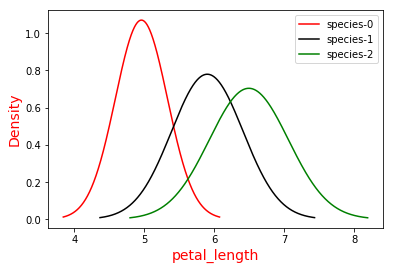

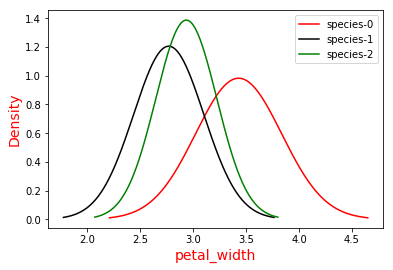

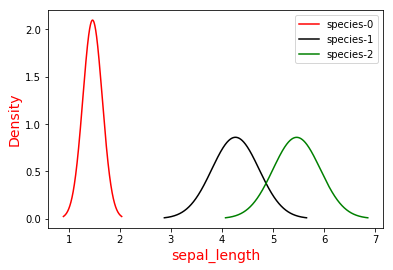

In [17]:
for label in labels:
    show_densities(label)

### Questions:

Use the widget above to look at the three class densities for each of the 4 features. Here are some questions for you:
1. For which feature (0-3) do the densities for classes 0 and 2 *overlap* the most?
2. For which feature (0-3) is class 2 the most spread out relative to the other two classes?
3. For which feature (0-3) do the three classes seem the most *separated* (this is somewhat subjective at present)?

How well can we predict the class (0, 1, 2) based just on one feature? The code below lets us find this out.

In [18]:
@interact(a=IntSlider(1,-100,100), b=IntSlider(1, -100,100), c=IntSlider(1,-100,100))
def eeeeee(a, b, c):
    x = np.linspace(1000, 0, 10)
    y = np.linspace(1000, 0, 10)
#     (a*x + b*y)%11 == c%11
#     plt.plot()
    pass


interactive(children=(IntSlider(value=1, description='a', min=-100), IntSlider(value=1, description='b', min=-…

In [19]:
def predict(mu, var, pi, testx, feature):
    n_test = testx.shape[0] # Number of test points
    k = 3 # Labels 0,1,2,...,k
    score = np.zeros((n_test, k)) # [test, label]

    for i in range(0, n_test):
        for label in range(0, k):
            ### START CODE HERE ###
            # Implement the formula for normal pdf. 
            p = np.exp(- (testx[i, feature] - mu[label])**2 / (2*var[label]) ) \
                / np.sqrt(2.0*np.pi*var[label])
            
#             p = norm.logpdf(testx[i, feature], loc=mu[label], scale=var[label])
            
            score[i, label] = pi[label] * p
    
    predictions = np.argmax(score, axis=1) #think about using np.argmax on score[]
    ### END CODE HERE ###
    return predictions
    

In [20]:
# @interact( feature=IntSlider(0,0,3) )
def test_model(feature, testx=testx, testy=testy):
    mu, var, pi = fit_generative_model(trainx, trainy, feature)
    n_test = len(testy) # Number of test points

    ### predict function, see above cell
    predictions = predict(mu, var, pi, testx, feature)
    
    # Finally, tally up score
    errors = np.sum(~np.equal(predictions, testy))
    print ("Test error using feature " + featurenames[feature] + ": " + str(errors) + "/" + str(n_test))
    return errors/n_test

### Questions:
In this notebook, we are looking at classifiers that use just one out of a possible 4 features. Choosing a subset of features is called **feature selection**. In general, this is something we would need to do based solely on the *training set*--that is, without peeking at the *test set*.

For the IRIS data, compute the training error and test error associated with each choice of feature.

Training error
Test error using feature petal_length: 26/105
Test error using feature petal_width: 45/105
Test error using feature sepal_length: 4/105
Test error using feature sepal_width: 4/105


<BarContainer object of 4 artists>

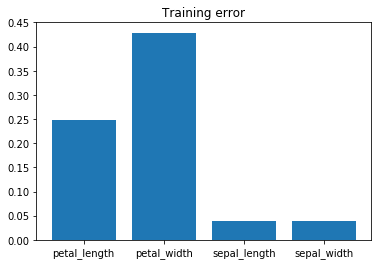

In [21]:
print('Training error')
scores = {}
for i, feature in enumerate(featurenames):
    scores[feature] = test_model(i, trainx, trainy)

# print(scores)

plt.title('Training error')
plt.bar(scores.keys(), scores.values())

Test error using feature petal_length: 12/45
Test error using feature petal_width: 20/45
Test error using feature sepal_length: 3/45
Test error using feature sepal_width: 2/45


<BarContainer object of 4 artists>

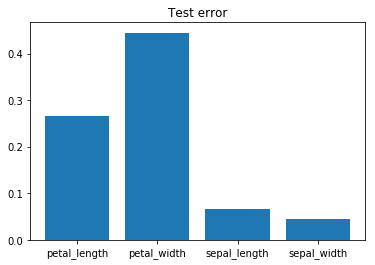

In [22]:
scores = {}
for i, feature in enumerate(featurenames):
    scores[feature] = test_model(i, testx, testy)

# print(scores)

plt.title('Test error')
plt.bar(scores.keys(), scores.values())

Based on your findings, answer the following questions:
* Which two features have the lowest training error? List them in order (best first).


* Which two features have the lowest test error? List them in order (best first).

it seems to be 'petal_length' has the smallest error,
then sepal_length and sepal_width (tied in second place).